In [1]:
import numpy as np
import pandas as pd
import healpy as hp
%config InlineBackend.figure_format = 'retina'
from DS_Planck_Unet import west_val, east_val
from matplotlib import pyplot as plt
from DS_Planck_Unet import load_planck_model, draw_pic_with_mask, draw_pic, val_pix
from DS_healpix_fragmentation import *
from DS_data_transformation import pic2fits, normalize
from DS_detector import *
import os
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm.notebook import tqdm
from DS_data_transformation import normalize
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from scipy.special import logit
from DS_models_stat import stat_orig_cats
from DS_detector import rematch_cat
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [2]:
def map_nside2(ax, big_pix, det_cat_file, true_cats_dir='/home/rt2122/Data/original_catalogs/csv/', s=50, special_cats=None, 
              add_legend=True):
    
    matr = one_pixel_fragmentation(2, big_pix, 10)
    mdict = matr2dict(matr)
    
    def cut_cat(cat):
        cat = cat[radec2pix(cat['RA'], cat['DEC'], 2) == big_pix]
        cat.index = np.arange(len(cat))
        cat['pix11'] = radec2pix(cat['RA'], cat['DEC'], 2**11)
        cat['x'] = -1
        cat['y'] = -1
        for i in cat.index:
            cat.loc[i, 'x'], cat.loc[i, 'y'] = mdict[cat.loc[i, 'pix11']]
        return cat
    
    #det_cat = cut_cat(pd.read_csv(det_cat_file))
    
    true_cats_files = next(os.walk(true_cats_dir))[-1]
    true_cats_files = [os.path.join(true_cats_dir, file) for file in true_cats_files]
    true_cats = {os.path.splitext(os.path.basename(file))[0] : cut_cat(pd.read_csv(file)) for file in true_cats_files}
    if special_cats is None:
        special_cats = list(true_cats)
    
    pic = np.ones_like(matr)
    pic[0, 0] = 0
    #_, ax = plt.subplots(1, 1, figsize=(15, 15))
    ax.imshow(pic, cmap='gray')
    #ss = ax.scatter(det_cat['x'], det_cat['y'], marker='x', c='r', s=s)
    #ss.set_label(os.path.splitext(os.path.basename(det_cat_file))[0])
    
    for name, marker, color in zip(true_cats, ['^', 's', 'o', 'v', '*'], ['c', 'r', 'g', 'c', 'g']):
        if (name in special_cats):
            continue
        ss = ax.scatter(true_cats[name]['x'], true_cats[name]['y'], marker=marker, alpha=0.6, s=s, c=color)
        ss.set_label(name)
    
    ax.set_xlabel(big_pix)
    if add_legend:
        ax.legend()

<ipython-input-2-0913268a876b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['pix11'] = radec2pix(cat['RA'], cat['DEC'], 2**11)
<ipython-input-2-0913268a876b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['x'] = -1
<ipython-input-2-0913268a876b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

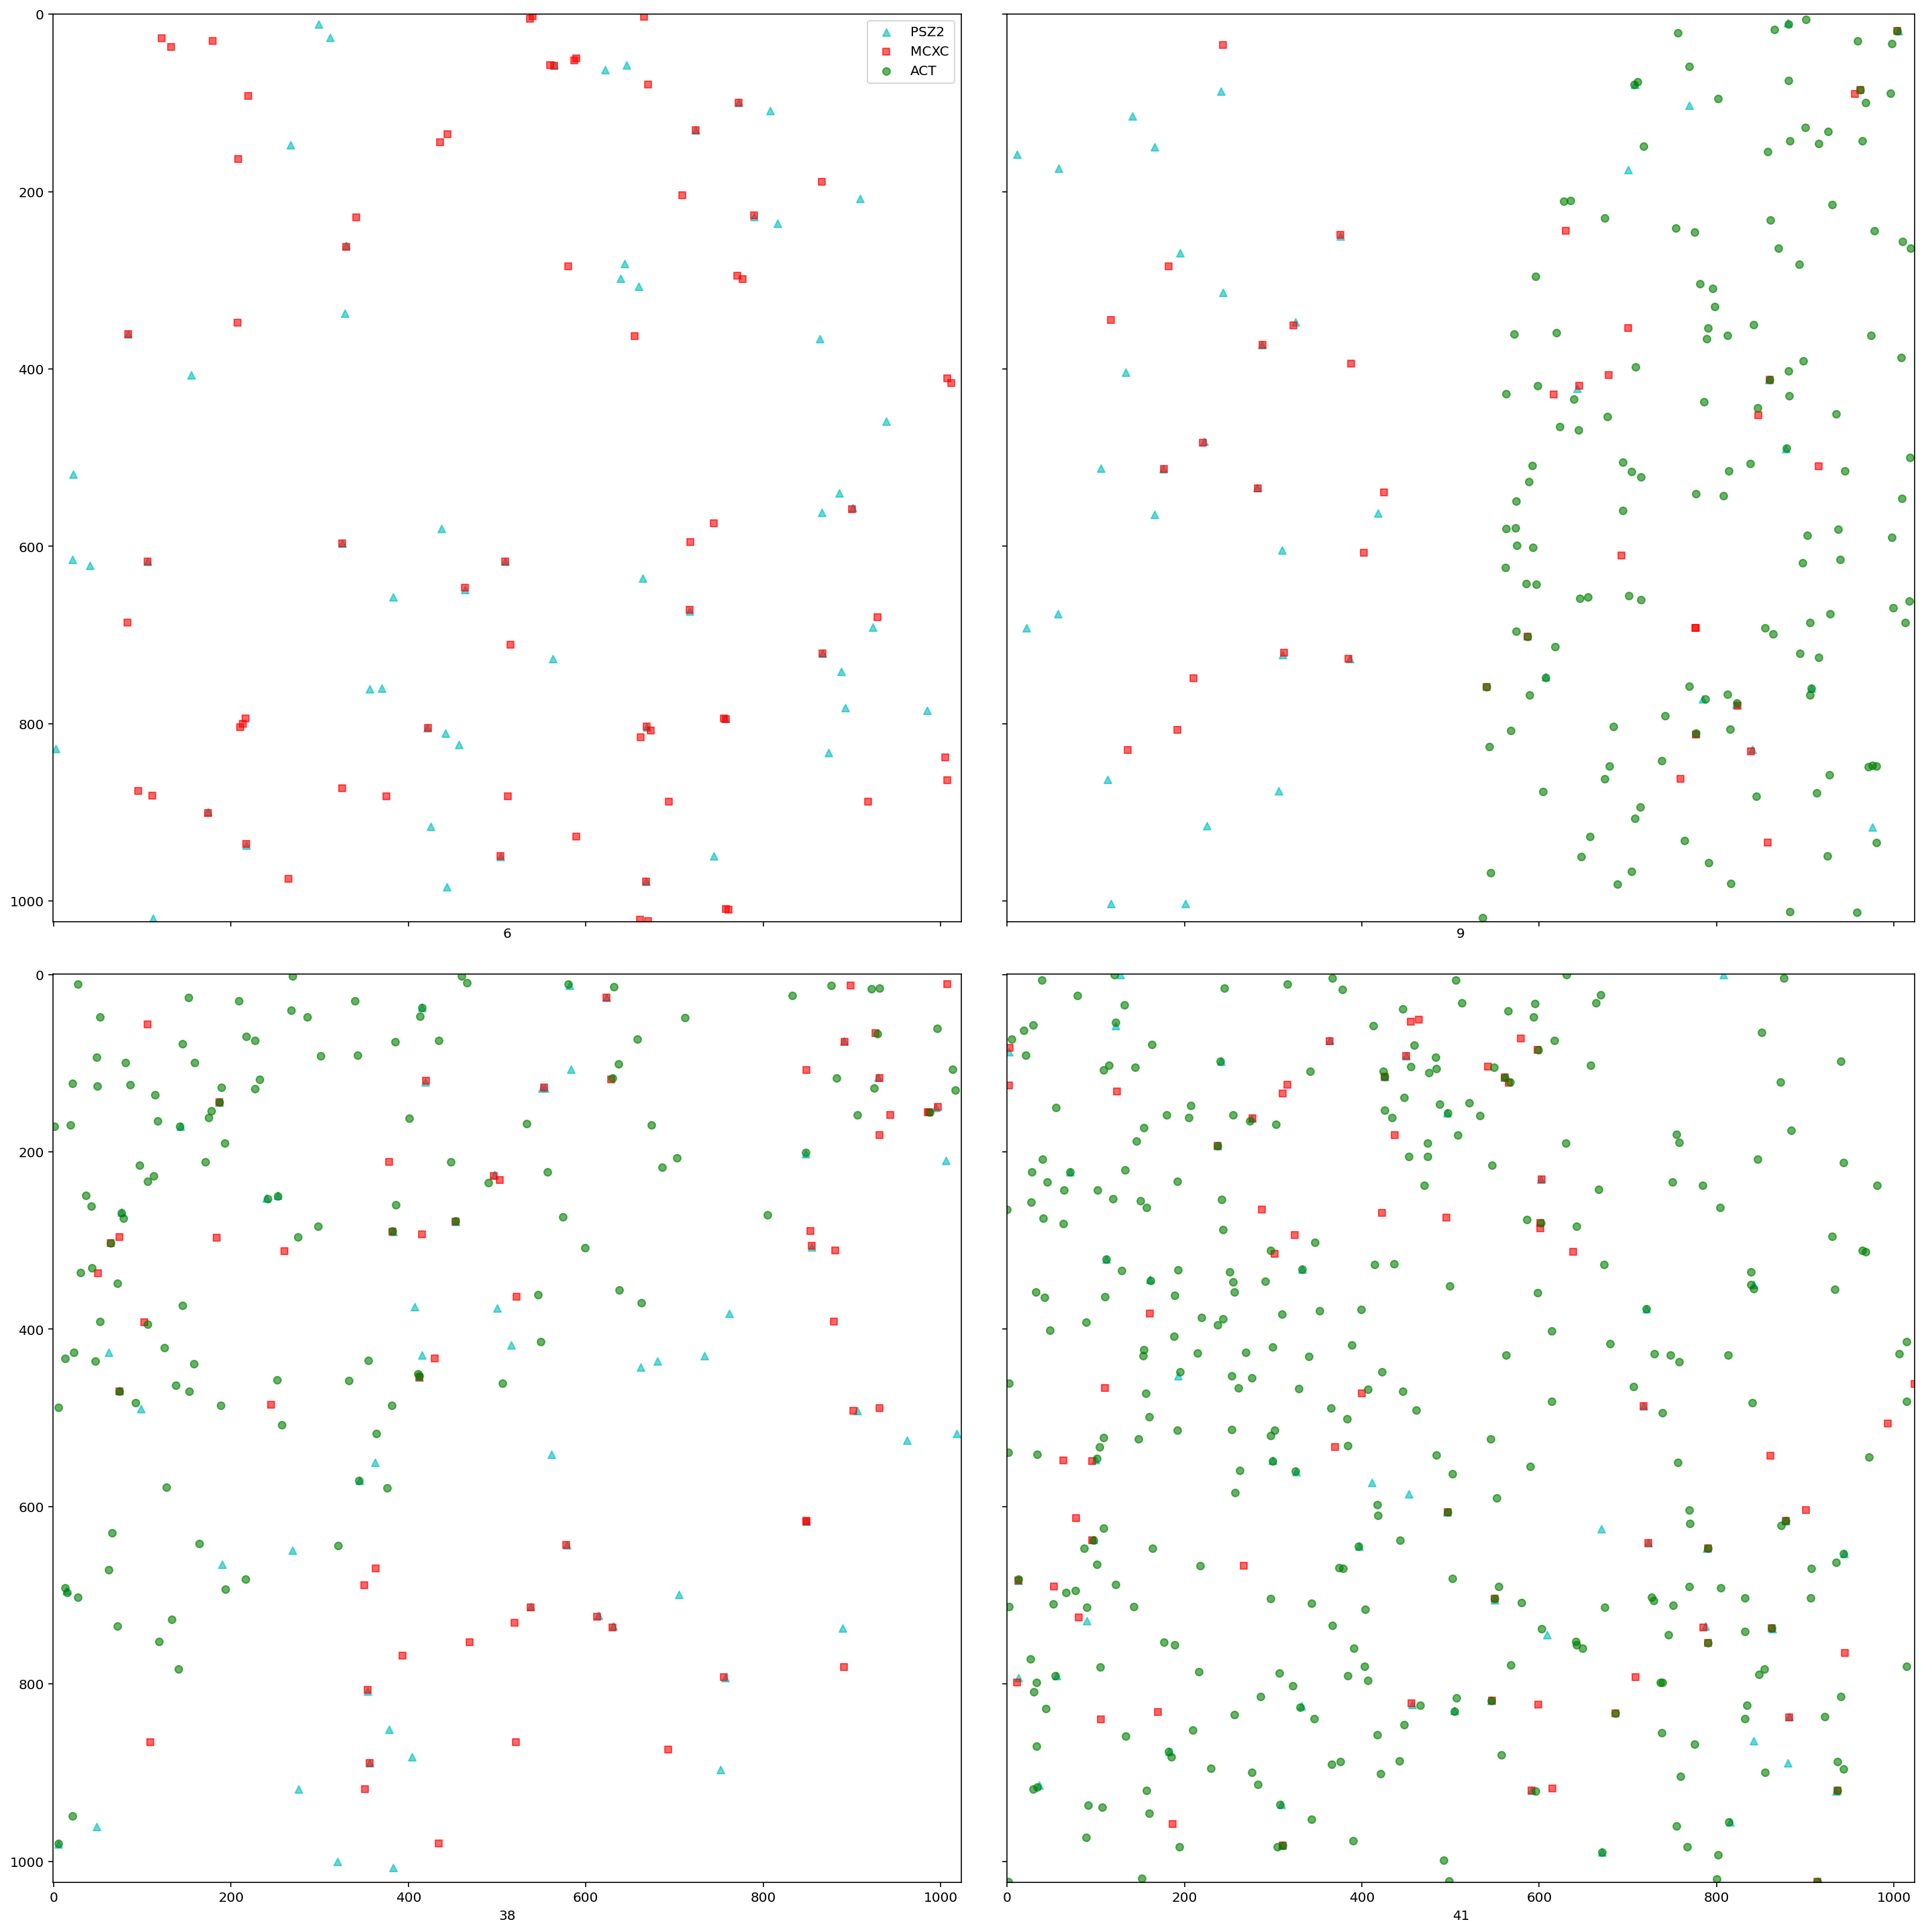

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20), sharex=True, sharey=True)
fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.05)
det_cat = '/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv'
s=30
map_nside2(ax[0][0], 6, det_cat, s=s, special_cats=['RM'])
map_nside2(ax[0][1], 9, det_cat, add_legend=False, s=s, special_cats=['RM'])
map_nside2(ax[1][0], 38, det_cat, add_legend=False, s=s, special_cats=['RM'])
map_nside2(ax[1][1], 41, det_cat, add_legend=False, s=s, special_cats=['RM'])